In [12]:

import pandas as pd
import numpy as np
!pip install prophet    

  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 2.0 MB/s eta 0:00:07
   - -------------------------------------- 0.4/13.3 MB 5.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/13.3 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/13.3 MB 5.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/13.3 MB 5.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/13.3 MB 5.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/13.3 MB 5.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/13.3 MB 3.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/13.3 MB 3.5 MB/s eta 0:00:04
   ----- ---------------------------------- 1.7/13.3 MB 3.8 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/13.3 MB 4.1 MB/s eta 0:00:03
   ----

In [5]:
df=pd.read_csv("disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [6]:
df.shape

(1368, 12)

In [7]:
df.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [8]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df.head())

  show_id  type  title  director  cast  country  date_added  release_year  \
0      s1     0     17       242    60       87         145          2021   
1      s2     0    980       459  1072       48         145          2011   
2      s3     0   1085       290   952       43         145          2014   
3      s4     1    316       549   713       43         144          2019   
4      s5     1    978       549    88       43         144          2021   

   rating  duration  listed_in  description  
0       5       142        254         1242  
1       0       149        212         1156  
2       2        32        233          652  
3       5        70         85          828  
4       6         0         14         1046  


In [9]:
df.shape

(1368, 12)

In [10]:
df1=df

In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

20:59:30 - cmdstanpy - INFO - Chain [1] start processing
20:59:32 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\pranitha\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pranitha\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


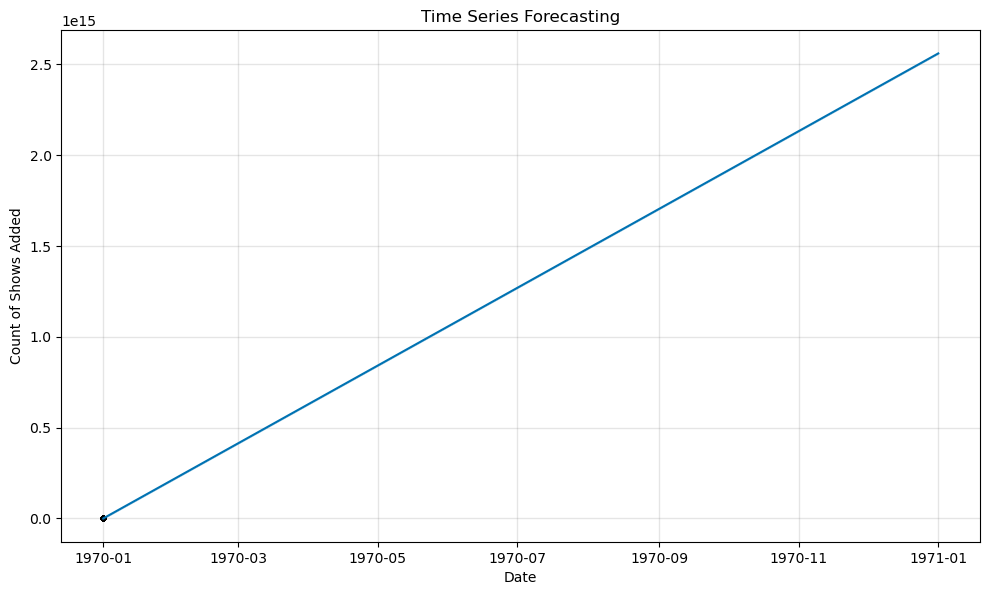

C:\Users\pranitha\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


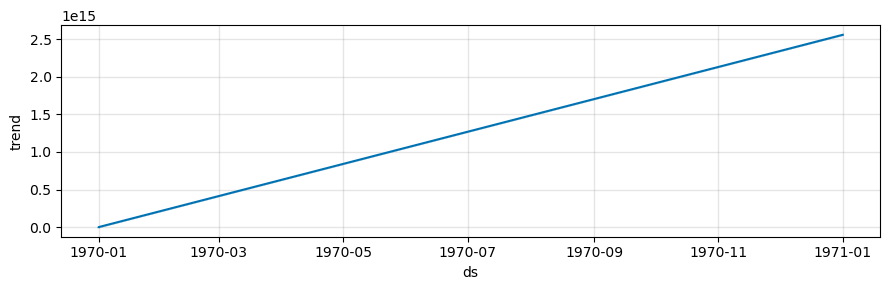

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['count'] = 1
df = df.groupby('date_added').count().reset_index()
df = df.rename(columns={'date_added': 'ds', 'count': 'y'})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)  # Forecast for 1 year
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Time Series Forecasting")
plt.xlabel("Date")
plt.ylabel("Count of Shows Added")
plt.show()
fig2 = model.plot_components(forecast)
plt.show()
     

In [15]:
!pip install pandas nltk vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 330.3 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 544.7 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 925.7 kB/s eta 0:00:00


In [16]:
import pandas as pd
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
df=pd.read_csv("disney_plus_titles.csv")
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['description'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
print(df[['description', 'sentiment', 'sentiment_class']])
     

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pranitha\AppData\Roaming\nltk_data...


                                            description  sentiment  \
0     Two Pixar filmmakers strive to bring their uni...     0.2263   
1     The puppies go on a spooky adventure through a...    -0.2023   
2     Hazel and Gus share a love that sweeps them on...     0.7506   
3     Matt Beisner uses unique approaches to modifyi...     0.0000   
4     Spidey teams up with pals to become The Spidey...     0.0000   
...                                                 ...        ...   
1363  Merlin trains a young orphan who's destined to...     0.0000   
1364  A strong-willed family struggles to establish ...    -0.3612   
1365   Welcome to Kirby's world! It's rude and sketchy.     0.0000   
1366  Ryan discovers his ability to control a giant ...     0.3182   
1367  Rock out with the Imagination Movers, Disney J...     0.5093   

     sentiment_class  
0           positive  
1           negative  
2           positive  
3            neutral  
4            neutral  
...              ... 

In [20]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
df=df1
df.fillna('Unknown', inplace=True)
label_encoders = {}
categorical_columns = ['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to avoid issues with None
    label_encoders[col] = le
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[categorical_columns])
print("K-means Clustering:")
print(df[['show_id', 'cluster']])
X = df.drop(columns=['show_id', 'type', 'cluster'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classification Accuracy: {accuracy:.2f}")
df['predicted_type'] = clf.predict(X)
print("\nDataframe with Predicted Types:")
print(df[['show_id', 'type', 'predicted_type', 'cluster']])

C:\Users\pranitha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

<bound method DataFrame.info of       type  title  director  cast  country  date_added  rating  duration  \
0        0    755        69   790       85          52       5       100   
1        0    388       336   945       38          52       0       108   
2        0   1335       128    93       32          52       2       137   
3        1    937       447   930       32          51       5        29   
4        1    385       447     4       32          51       6         0   
...    ...    ...       ...   ...      ...         ...     ...       ...   
1363     0    518       471    86       32          38       0        91   
1364     0    541       269   233       32          38       1       143   
1365     1    861       447   627       32          58       7        41   
1366     1    864       447   996       52          58       7        29   
1367     1   1188       447  1116       32          58       6        41   

      listed_in  
0            83  
1            32  
2